# BIOMEDIN 260/RAD260: Problem Set 1 - Segmentation

## Spring 2025

## Group Work

Before we go any further: we encourage teamwork, and you can work by yourself or in pairs (2 people working together equally and submitting one notebook for the both of you). Who said radiology had to be lonely?

**Person 1:**

YOUR NAME HERE

**Person 2:**

YOUR NAME HERE

## iPython Notebooks: A lesson in reproducibility

For those of you that are unfamiliar, iPython notebooks are interactive Python sessions that allow you to intersperse code, raw text, and markdown in a seamless manner. The next paragraph will teach you to use them.

The words you are reading right now are modifiable. Double-click me to change the text that you're reading. These modifiable boxes are called cells. They will be used to write answers to our written questions.

Double-click the box above me now, and go ahead and fill in your name (and your partner's as well, if applicable).

Cells can contain executable code as well. If you're running the Jupyter Notebook program, You can change the type of cell by highlighting the cell of interest and going to `Cell -> Cell Type -> Markdown/Code`, and then clicking the desired cell type. If you're running the newer JupyterLab program, just click the drop-down menu next to the play, stop, and refresh icons above this window (along the top of the tabs detailing the current files that are open) and change the cell type directly there.

You can add cells using Insert in the Jupyter Notebook program and the `'+'` icon in JupyterLab.

The best thing about notebooks is that you can run small components of your code in one cell to make sure they work before putting them together to make a larger component. Make as many cells as you want to play and experiment, but please delete them if they are not part of your final submission. To delete a cell, highlight the cell and going to `Edit -> Delete Cells`, or use the keyboard shortcut of pressing the 'D' button twice. Make sure to not do this by mistake, but if you do, you can `"Redo Cell Operation"` from the respective menus in the different programs.

Another nice thing about notebooks - the entire homework assignment is self-contained in this file! Please put all your functions and classes into the cells of this notebook, and please write clean code with at least some annotation to help us follow your thought process. Once you're done, export the notebook to a `.pdf` file.

In research, it is important that code is readable and reproducible. Notebooks are a natural first step toward both goals.

# Setup

If you are running this in a colab session (the format we recommend), you will need to install some dependencies and ensure the notebook can access the files for this assignment, then we will import the relevant packages.

In [71]:
# Install packages
!pip install -q pydicom scikit-image matplotlib

In [65]:
#####################
### DO NOT MODIFY ###
#####################

# Some packages you might need, you can add more if you need them
import os
import requests
from io import BytesIO

import skimage
import pydicom
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
from IPython.display import Image as IpImage


%matplotlib inline
GIF_1 = "https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExMmkwN2wzZDAwMHh5YWRwanF6aG9kdWpvM20wdG9qenlyNGx0bXZvYyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/CjmvTCZf2U3p09Cn0h/giphy.gif"

# This is a helper function to show our figures in the notebook
def show_figure(figure_name:str,figure_size:tuple[int,int]=None) -> None:
  base_url = f"https://drive.google.com/uc?id="
  figure   = Image.open(BytesIO(requests.get(base_url+figure_name).content))
  if figure_size:
    figure = figure.resize((500, 500))
  display(figure)

# The Data

We will be using data from the recent (2017) Kaggle Data Bowl challenge in this homework. You can download their data
freely from [Kaggle](https://www.kaggle.com/c/data-science-bowl-2017) or on [Canvas](https://canvas.stanford.edu/courses/206247/files/folder/Data). We highly recommend downloading the “`CT_chest_scans.zip`” file on Canvas as this’ll give you full CT scans, but won’t take a day to download (total size < 1 GB).

**Please download and unzip the data folder as soon as possible. Even the file for just the sample data is pretty big, coming in at ∼800 MB. You need the data to do the assignment. We will not accept your homework using any other data. Please try to download the data as soon as possible, and contact the TAs if you run into any problems. Do not wait until the last minute to download the data!**

The data consist of sets of DICOM images that hold completely anonymized chest CT scans (see section “Reading in the Data”). DICOM (Digital Imaging and Communications in Medicine) is a standardized format for transmitting medical image data. Each DICOM file is composed of two parts: the image data as well as a header giving you a lot of metadata about the patient and specifics about the imaging parameters (e.g. space between slices).

You can choose any of the patients in the Kaggle dataset (sample, training, or validation) to prototype your code, but we expect you to generalize your algorithm to work for at least ten different patients to show robustness. The more you do, the more you’ll prove your algorithm.

**Make sure to follow this steps before you start the assigment:**
1. Create a folder named "BMI260" in your Google Drive.

2. Download the data from Canvas or Kaggle.

3. Unzip The data

4. Upload the data to your newly created "BMI260" folder.


Note that your directory should have the structure:
```
BMI260/
   CT_chest_scans/
      0c98fcb55e3f36d0c2b6507f62f4c5f1/
      ...
```

Now, we need to mount your drive to access the data:

In [ ]:
# Run these commands to mount this drive so our notebook has access to these files
from google.colab import drive
drive.mount('/content/drive')

DATA_DIR = "drive/MyDrive/BMI260/" # If you have saved this directory elsewhere, adjust the path here

# Confirm that the relevant files are present
! ls {DATA_DIR}

First, let's make sure you can read in the data.

In the cell below, replace the `scans_path` string variable with the (relative or absolute) path to the place where you put the data. Particularly, look for the folder that contains scans. Each scan is in its own folder and has a name, e.g. 0a0c32c9e08cc2ea76a71649de56be6d. `scans_path` should be the folder that contains these oddly named folders. Once you do this, you can run the cell below to look at all the metadata associated with that slice.

It should look like this:

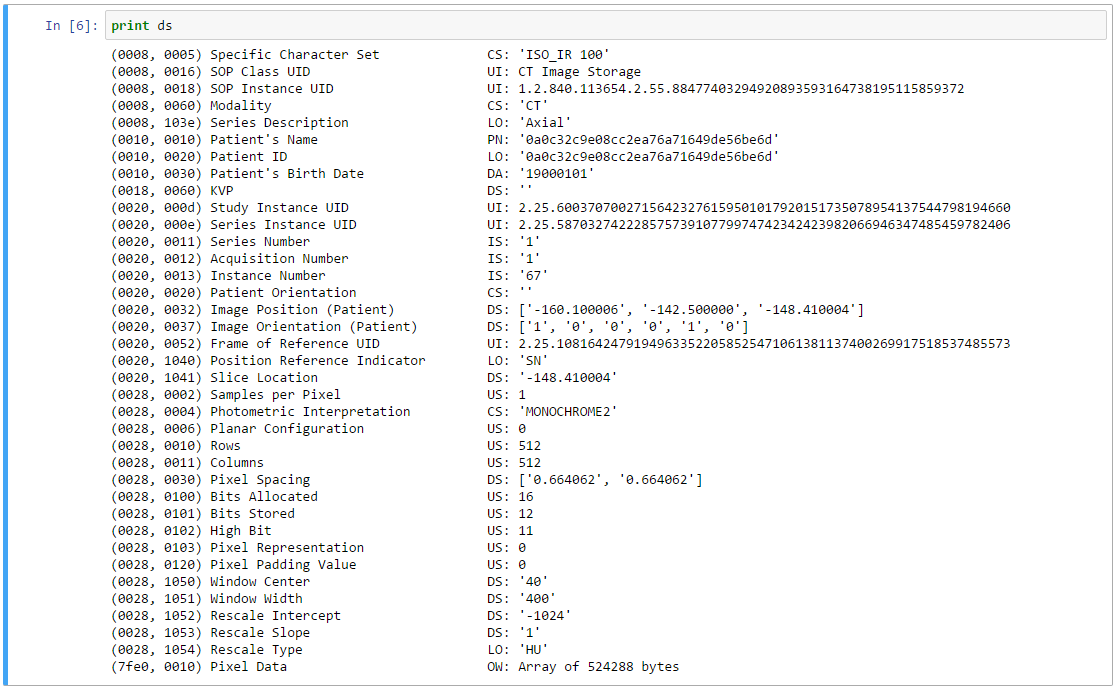

In [17]:
#####################
### DO NOT MODIFY ###
#####################
show_figure("1219YSVSubXu93P5de5shFo8HPoZL7riN")

In [ ]:
! ls drive/MyDrive/BMI260/CT_chest_scans/

0a099f2549429d29b32f349e95fb2244  0bd0e3056cbf23a1cb7f0f0b18446068
0a0c32c9e08cc2ea76a71649de56be6d  0c0de3749d4fe175b7a5098b060982a1
0a38e7597ca26f9374f8ea2770ba870d  0c60f4b87afcb3e2dfa65abbbf3ef2f9
0acbebb8d463b4b9ca88cf38431aac69  0c98fcb55e3f36d0c2b6507f62f4c5f1
0b20184e0cd497028bdd155d9fb42dc9  0c9d8314f9c69840e25febabb1229fa4


In [ ]:
# each chest CT scan is a folder with a long weird name like 0acbebb8d463b4b9ca88cf38431aac69 that within contains
# many .dcm files with similar long weird names, assign the path to such folder to the variable scans_path

scans_path = DATA_DIR+"CT_chest_scans" # You may need to change this to match where your data is located!
list_of_scans = os.listdir(scans_path)
list_of_scans.sort()

# for figuring out the controls lets experiment with slice 20 of scan 0acbebb8d463b4b9ca88cf38431aac69
patient_name = '0acbebb8d463b4b9ca88cf38431aac69'
print(f'Patient name: {patient_name}')
scan_path = os.path.join(scans_path, patient_name)
list_of_slices = os.listdir(scan_path)
slice_num = 20
slice_path = os.path.join(scan_path, list_of_slices[slice_num])

# read in the full path to the file as ds
ds = pydicom.dcmread(slice_path)
print(ds)

Patient name: 0acbebb8d463b4b9ca88cf38431aac69
Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 196
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7009.9004.952759033432244823149926280255
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7009.9004.952759033432244823149926280255
(0008,0060) Modality                            CS: 'CT'
(0008,103E) Series Des

In [ ]:
print(list_of_scans)

['.DS_Store', '0a099f2549429d29b32f349e95fb2244', '0a0c32c9e08cc2ea76a71649de56be6d', '0a38e7597ca26f9374f8ea2770ba870d', '0acbebb8d463b4b9ca88cf38431aac69', '0b20184e0cd497028bdd155d9fb42dc9', '0bd0e3056cbf23a1cb7f0f0b18446068', '0c0de3749d4fe175b7a5098b060982a1', '0c60f4b87afcb3e2dfa65abbbf3ef2f9', '0c98fcb55e3f36d0c2b6507f62f4c5f1', '0c9d8314f9c69840e25febabb1229fa4']


## That's a lot of metadata, right? Don't be scared. Next, let's actually look at the slice.

We can see that there are many data fields in a DICOM file. There's a lot of patient information stored in a DICOM - name, birthdate, and so on. For obvious privacy reasons, this data has been completely anonymized. It’s pretty evident that our data probably didn’t come from Mr./Mrs. 0acbebb8d463b4b9ca88cf38431aac69 who was born on January 1st, 1900.

## Displaying images is fundamental to working in this field.
Run the following cell to view the image associated with this very old person. Notice the data type.

In [ ]:
rawimg = ds.pixel_array
plt.imshow(rawimg, cmap='viridis')
plt.show()
print(type(rawimg), np.mean(ds.pixel_array), rawimg.dtype)

### Why is the image blue and green if CT slices are grayscale images?
Previously we defined a `viridis` colormap for plotting. Let's change the colormap to one that matches our perception better and remove the pixel coordinate numbers for a cleaner visualization.

In [ ]:
rawimg = ds.pixel_array
plt.imshow(rawimg, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()
print(type(rawimg), np.mean(ds.pixel_array), rawimg.dtype)

## We're all set. On to the problem set!

In [64]:
#####################
### DO NOT MODIFY ###
#####################
IpImage(url=GIF_1,width=200)

# Introduction

Segmentation is the process of dividing a given image into sections. This can be binary segmentation (if you wanted to separate the image into foreground and background) or a multilabel segmentation if you wanted to label many different parts of an image (see figures below for examples of each). Segmentation is an extremely interesting problem in image analysis, and it has yet to be solved perfectly. From an algorithmic point of view, we can approach the problem using tools such as graph cuts, watershed, flood fill / region growing, statistical set separation, etc... From a machine learning point of view, we can think of the problem as a pixel classification problem that can be solved with some supervised learning algorithm (assuming we had some ground truth training data) or an unsupervised learning algorithm (such as k-means clustering).

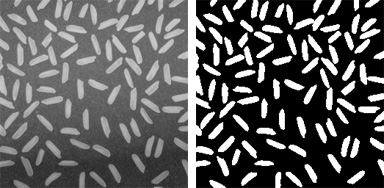


(a) Binary Segmentation - A binary segmentation of some grains of rice. We can use segmentation
to create a binary mask that allows us to separate the rice (foreground) from the darker background.



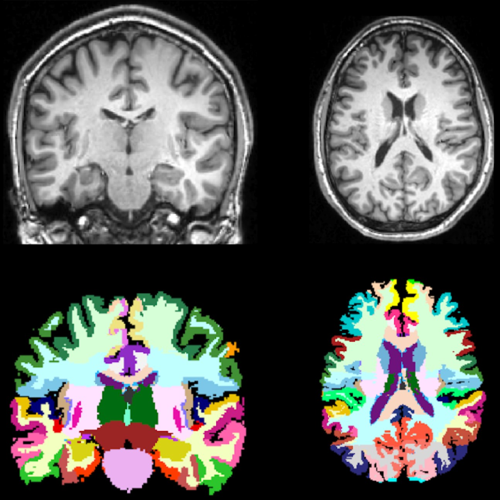


(b) Multilabel Segmentation - A multilabel segmentation from a magnetic resonance image of the brain.
We can see that different colors represent different sections of the brain.




In [32]:
#####################
### DO NOT MODIFY ###
#####################
print()
show_figure("1v56dbyjh5ugOflw5WLJ5yNe_TaDa51R5")
print("\n(a) Binary Segmentation - A binary segmentation of some grains of rice. We can use segmentation\nto create a binary mask that allows us to separate the rice (foreground) from the darker background.\n")
show_figure("1yWBKUYqBfH8zvT-7Bga0LaUtSIYdbDmO",(5,5))
print("\n(b) Multilabel Segmentation - A multilabel segmentation from a magnetic resonance image of the brain.\nWe can see that different colors represent different sections of the brain.\n\n")

(a) Binary Segmentation - A binary segmentation of some grains of rice. We can use segmentation to create a binary mask that allows us to separate the rice (foreground) from the darker background.







(b) Multilabel Segmentation - A multilabel segmentation from a magnetic resonance image of the brain. We can see that different colors represent different sections of the brain.
<!-- For example, the white matter on the left side of the brain is labeled with a different color than the white matter on the right side of the brain.  -->

A lot of radiological image analysis begins with segmentation. For example, to quantitatively describe a lung nodule, you may want to collect data on its edge sharpness, its total volume, and/or the mean intensity of voxels in the nodule. However, to do this, we have to first be able to segment the nodule and cleanly define its boundaries. This can get extremely hairy. For example, in the chest, it might be hard to teach a program to segment a nodule in the lung from a seed voxel. It's important to make sure the nodule segmentation doesn’t bleed into the pericardium, as the voxel intensities for a nodule and the fleshy bits in the pericardium are very similar. We can try and restrict this through lung field segmentation (basically, we want to go through our chest CT scans and segment out the lungs) and thus define a region of interest, but this gets increasingly difficult as more and more problems pop up.

This assignment will help you understand many core concepts taught in the lectures and hopefully
integrate the lectures into a medically relevant application. The goals of this project include:

a. Understanding medical image data format - specifically, DICOM.

b. Understanding thresholding techniques - specifically, Otsu’s Threshold.

c. Understanding morphological image analysis techniques, and expanding this understanding into 3D.

d. Understanding image convolution and expanding it into efficient 3D.

e. Understanding visualization in 3D.

f. Embracing creativity and exploring image analysis.

These can seem daunting tasks for a first timer, but we promise the final results will be amazingly cool! Stick with us, and as always, don't hesitate to ask for help.

**The main goal of this assignment is to segment out the lungs, and only the lungs, from these CT slices, and then create a 3D rendering of the lungs to give yourself some way to qualitatively assess how good your segmentation is. Basically, given a chest CT series, you will be creating something like this:**

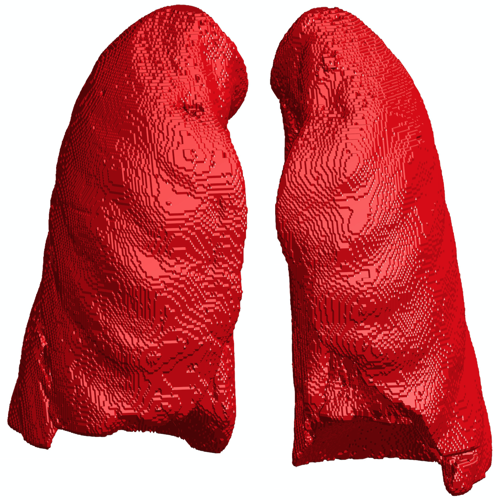

In [34]:
#####################
### DO NOT MODIFY ###
#####################
show_figure("1elVyB7nUtYx_TynzRsy-2KJwLznMUbGi",(300,100))

# Step 1: (5 points)

Some important DICOM fields like $RescaleIntercept$ and $RescaleSlope$ determine how the image pixel values should be interpreted. These metadata are critical for quantitative imaging methods like CT. The default raw pixel values are arbitrary units returned from the actual machine used and may differ based on the scanner manufacturer. We’d like to convert these raw values to Hounsfield units, which you learned about in lecture, in order to have some standardization among all of our CT scans. The conversion formula is:

$$ \textrm{Hounsfield Units} = RescaleSlope \times \textrm{Raw Image} + RescaleIntercept $$

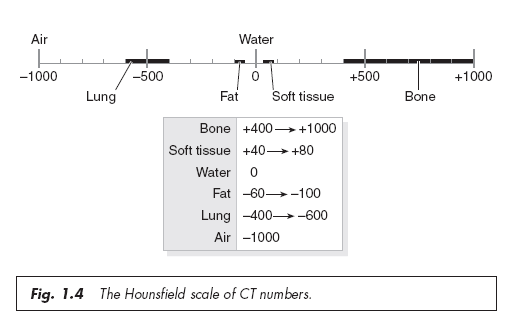

In [35]:
#####################
### DO NOT MODIFY ###
#####################
show_figure("14Ch0vqTWeqpQFXWuaWBohumxQCkQaTMI")

### Deliverable:

1) Read in the raw data of any slice from the CT for the patient above (`0acbebb8d463b4b9ca88cf38431aac69`)
2) Convert the raw pixel values into Hounsfield units using the formula above. Hint: use the metadata in the DICOM file.
3) Compute the max, min, mean, and standard deviation of both images (raw data and Hounsfield units)
4) Compare the the summary statistics (max, min, mean, std) of both images.

In [ ]:
######################################################################################################
### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######
######################################################################################################

######################################################################################################

# Step 2: (25 points)

As you may have noticed, we live in a 3D world. The next main part of your problem will be to go from all the individual slices of the CT scan (each one stored as a .dcm file) into a 3D volume. Basically, you’ll need to figure out some way to order these slices in the right order. Read in a few of the DICOM images from your patient, and try using different DICOM fields as a sorting key. You may find one of them works well in sorting the slices in the correct order. Try looking up what that field means in the DICOM standard. *Hint: you may want to initialize a blank 3D matrix called `volCT` or something.*

Here is the pseudocode for one way (you are free to do your own) of creating this volume and filling it:

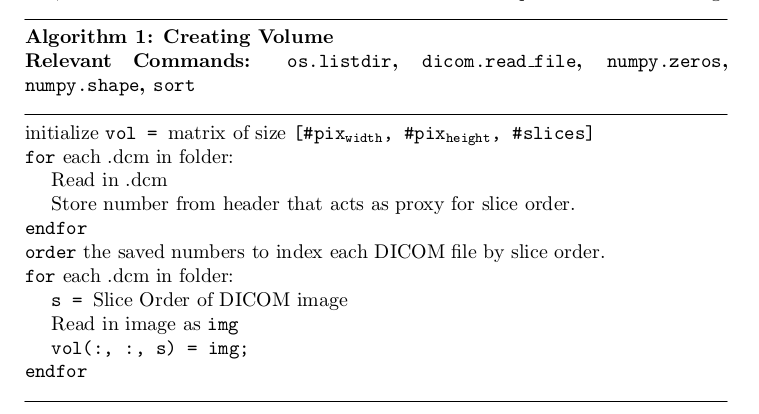

In [36]:
#####################
### DO NOT MODIFY ###
#####################
show_figure("1hcx4MuurJf1Ciac6iL5CXGpCZGLrVRE1")

Visualize the NumPy volume you create from the stacks. Feel free to do this within Python with something like matplotlib.

### Deliverable:

Organize the 3D volume into an array and display 25 of the slices in correct order for us, like this:

In [39]:
#####################
### DO NOT MODIFY ###
#####################
show_figure("1USDM5E-GLBmuxZGGyYLeGjbWaQU9hD-A")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
######################################################################################################
### WRITE CODE IN HERE. You can have up to 4 cells for this question, but only one is required #######
######################################################################################################


######################################################################################################

In [ ]:
###### Display the organized CT volume ######
fig, ax = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(volCT[:, :, (5*i+j)*5], cmap='gray')
        ax[i, j].axis("off")
        plt.tight_layout()
        plt.rcParams['figure.figsize'] = (30, 18)


# Step 3 (5 points)

If you dont already know about numerical types, take a look [here](https://numpy.org/doc/stable/user/basics.types.html) and/or [here](https://www.tutorialspoint.com/numpy/numpy_data_types.htm).

### Deliverable:

1) What is the default numerical type used to store raw image data in DICOM files? Answer in the cell provided below.

**Answer:** YOUR ANSWER TO SETP 3 PART 1) HERE

2) In the coding cell below that one, convert all the pixels in your volume to a float32 type number between 0.0 and 1.0; output the min, max, and dtype (datatype) of the pixels in your volume before and after you convert.

In [ ]:
#########################################################
### WRITE CODE IN HERE. Your code to answer to 2) #######
#########################################################


#########################################################

# Step 4 (10 points)

Now that we have our 3D matrix of lung CT data, we can try to segment out our lung. We know from lecture that the pixel values of CT scans are given in Hounsfield units, where lower Hounsfield units correspond to low density materials (like air) that are not highly attenuative for X-rays and higher Hounsfield units correspond to highly attenuative materials, like bone.

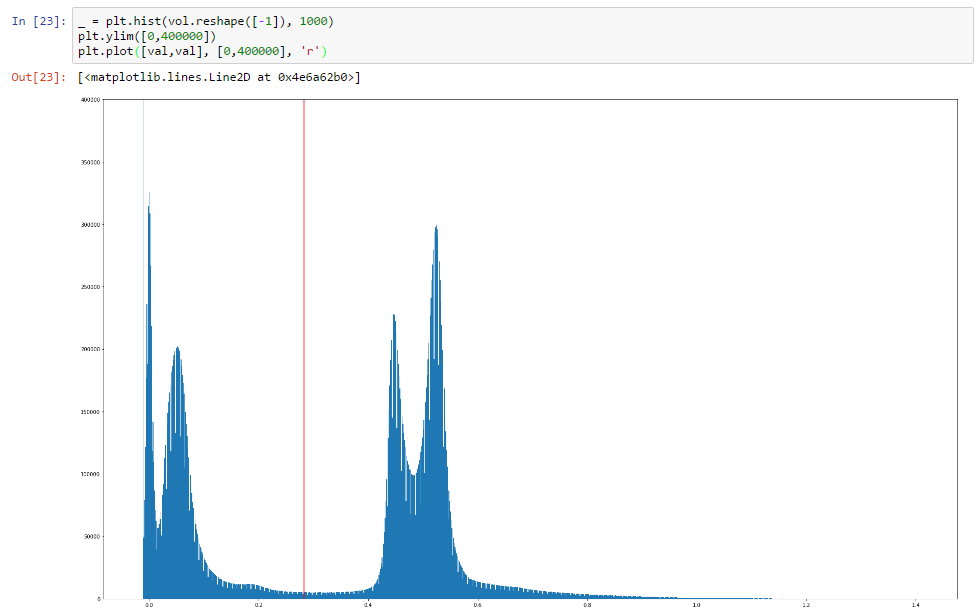

In [40]:
#####################
### DO NOT MODIFY ###
#####################
show_figure("1a6z2CYD9kq5HzvYomn8iOoyGZ9djds0V")

That red line separating the two groups of pixels is the [Otsu's threshold](https://en.wikipedia.org/wiki/Otsu%27s_method). We can find a nice separating value of our two modes with [this Otsu’s method](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html).

### Deliverable:

1) A histogram of the Hounsfield units from a typical CT scan will be significantly bimodal! Why?

This is because our body tends to be comprised of denser material like bone interspersed with more sparse material like air and liquids. Therefore, we will have a bimodal distribution with the lower end of the spectrum representing sparser material and the higher end representing denser material.

**Answer:** YOUR ANSWER TO STEP 4 PART 1 HERE

2) Find the Otsu's threshold in your volume of pixels and plot the histogram of of your pixels with this line like the example figure. You will find these links ([1](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html), [2](https://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html), and [3](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvline.html)) useful if you have not done this before.

In [ ]:
######################################################################################################
### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######
######################################################################################################

######################################################################################################

# Step 5 (10 points)

We can now take a look at the performance of Otsu’s threshold. We want all the pixels less than Otsu’s threshold since the lung is in the darker (low Hounsfield units) part of the image.

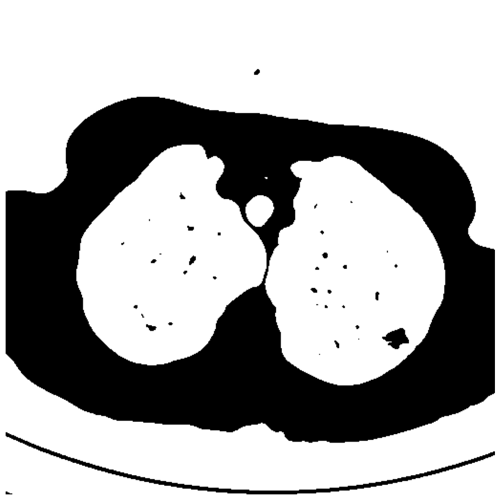

In [42]:
#####################
### DO NOT MODIFY ###
#####################
show_figure("1-yWZCFgDlx3xboJd42qBomz3jtwFMTHt",(300,300))

Despite the crude binary cutoff, we can see that this is really close to what we want for a final result, albeit with background and inne lung noise.

### Deliverable:

Display for us any one slice of the CT scan showing a binary image after applying thresholding using Otsu's method. Usually it's convention to show the area of interest after the segmentation in white and the background as black.

In [43]:
######################################################################################################
### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######
######################################################################################################

######################################################################################################

# Step 6 (30 points)

Our dark lungs are surrounded by lighter-colored tissue, which is then again surrounded by darkness. Our lung segmentation is thus, interestingly, completely separated from the segmentation of the outside air. These two sets of binary connected components are completely unconnected. Can you think of a simple way of differentiating between the lungs and the air outside the body?

Here's one way to do it - we assume that the outside air will always be touching the edge of the image and the lungs will not:

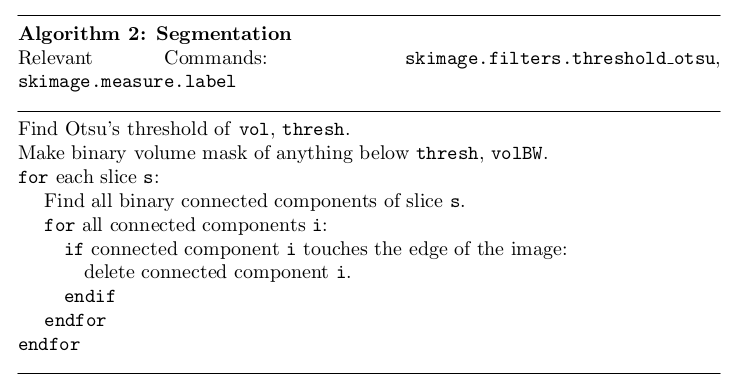

In [44]:
#####################
### DO NOT MODIFY ###
#####################
show_figure("1xrZ5fvDPuW3Ws3nr6ygpDon6qMR4S3mq")

However the segmentation is still rough around the edges. There are a few pixels of noise around the main lung (components that weren’t touching the edges, but still aren’t part of the lung). Luckily for us, these bits are quite small in size. We can therefore quickly filter them out based on their volume. We want to choose connected components that have a volume greater than some threshold $V$. You can choose $V$ arbitrarily (most noise will have pixel counts in the double digits or maybe low hundreds), as long as the lung volume should have a pixel count several orders of magnitude higher.

Here would be a possible pseudo-algorithm for this task:

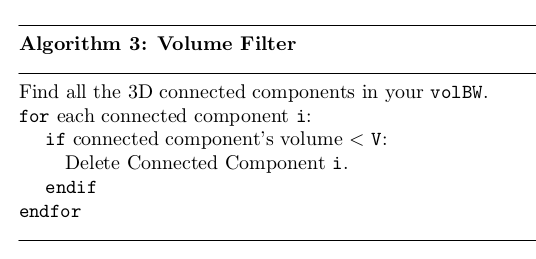

In [46]:
#####################
### DO NOT MODIFY ###
#####################
show_figure("10gHrQR5-fw-uRHXf9KTGP2oQJzR4pReh")

After this, we just want to smooth out the edges. The segmentation of our lung looks very ragged because it wasn’t able to pick out the lighter colored blood vessels in the lung. We can do this smoothing with a binary closing algorithm, provided by the `scikit-image` package (`skimage.morphology.binary_closing`). It works for both 2-dimensional and 3-dimensional binary matrices.

### Deliverable:

Implement the steps described here and display for us an ordered sample of the cuts from your boolean CT scan volume that has been smoothed, with only the pixels of the lung and trachea as 1/true, and everything else as 0/False,  like this:

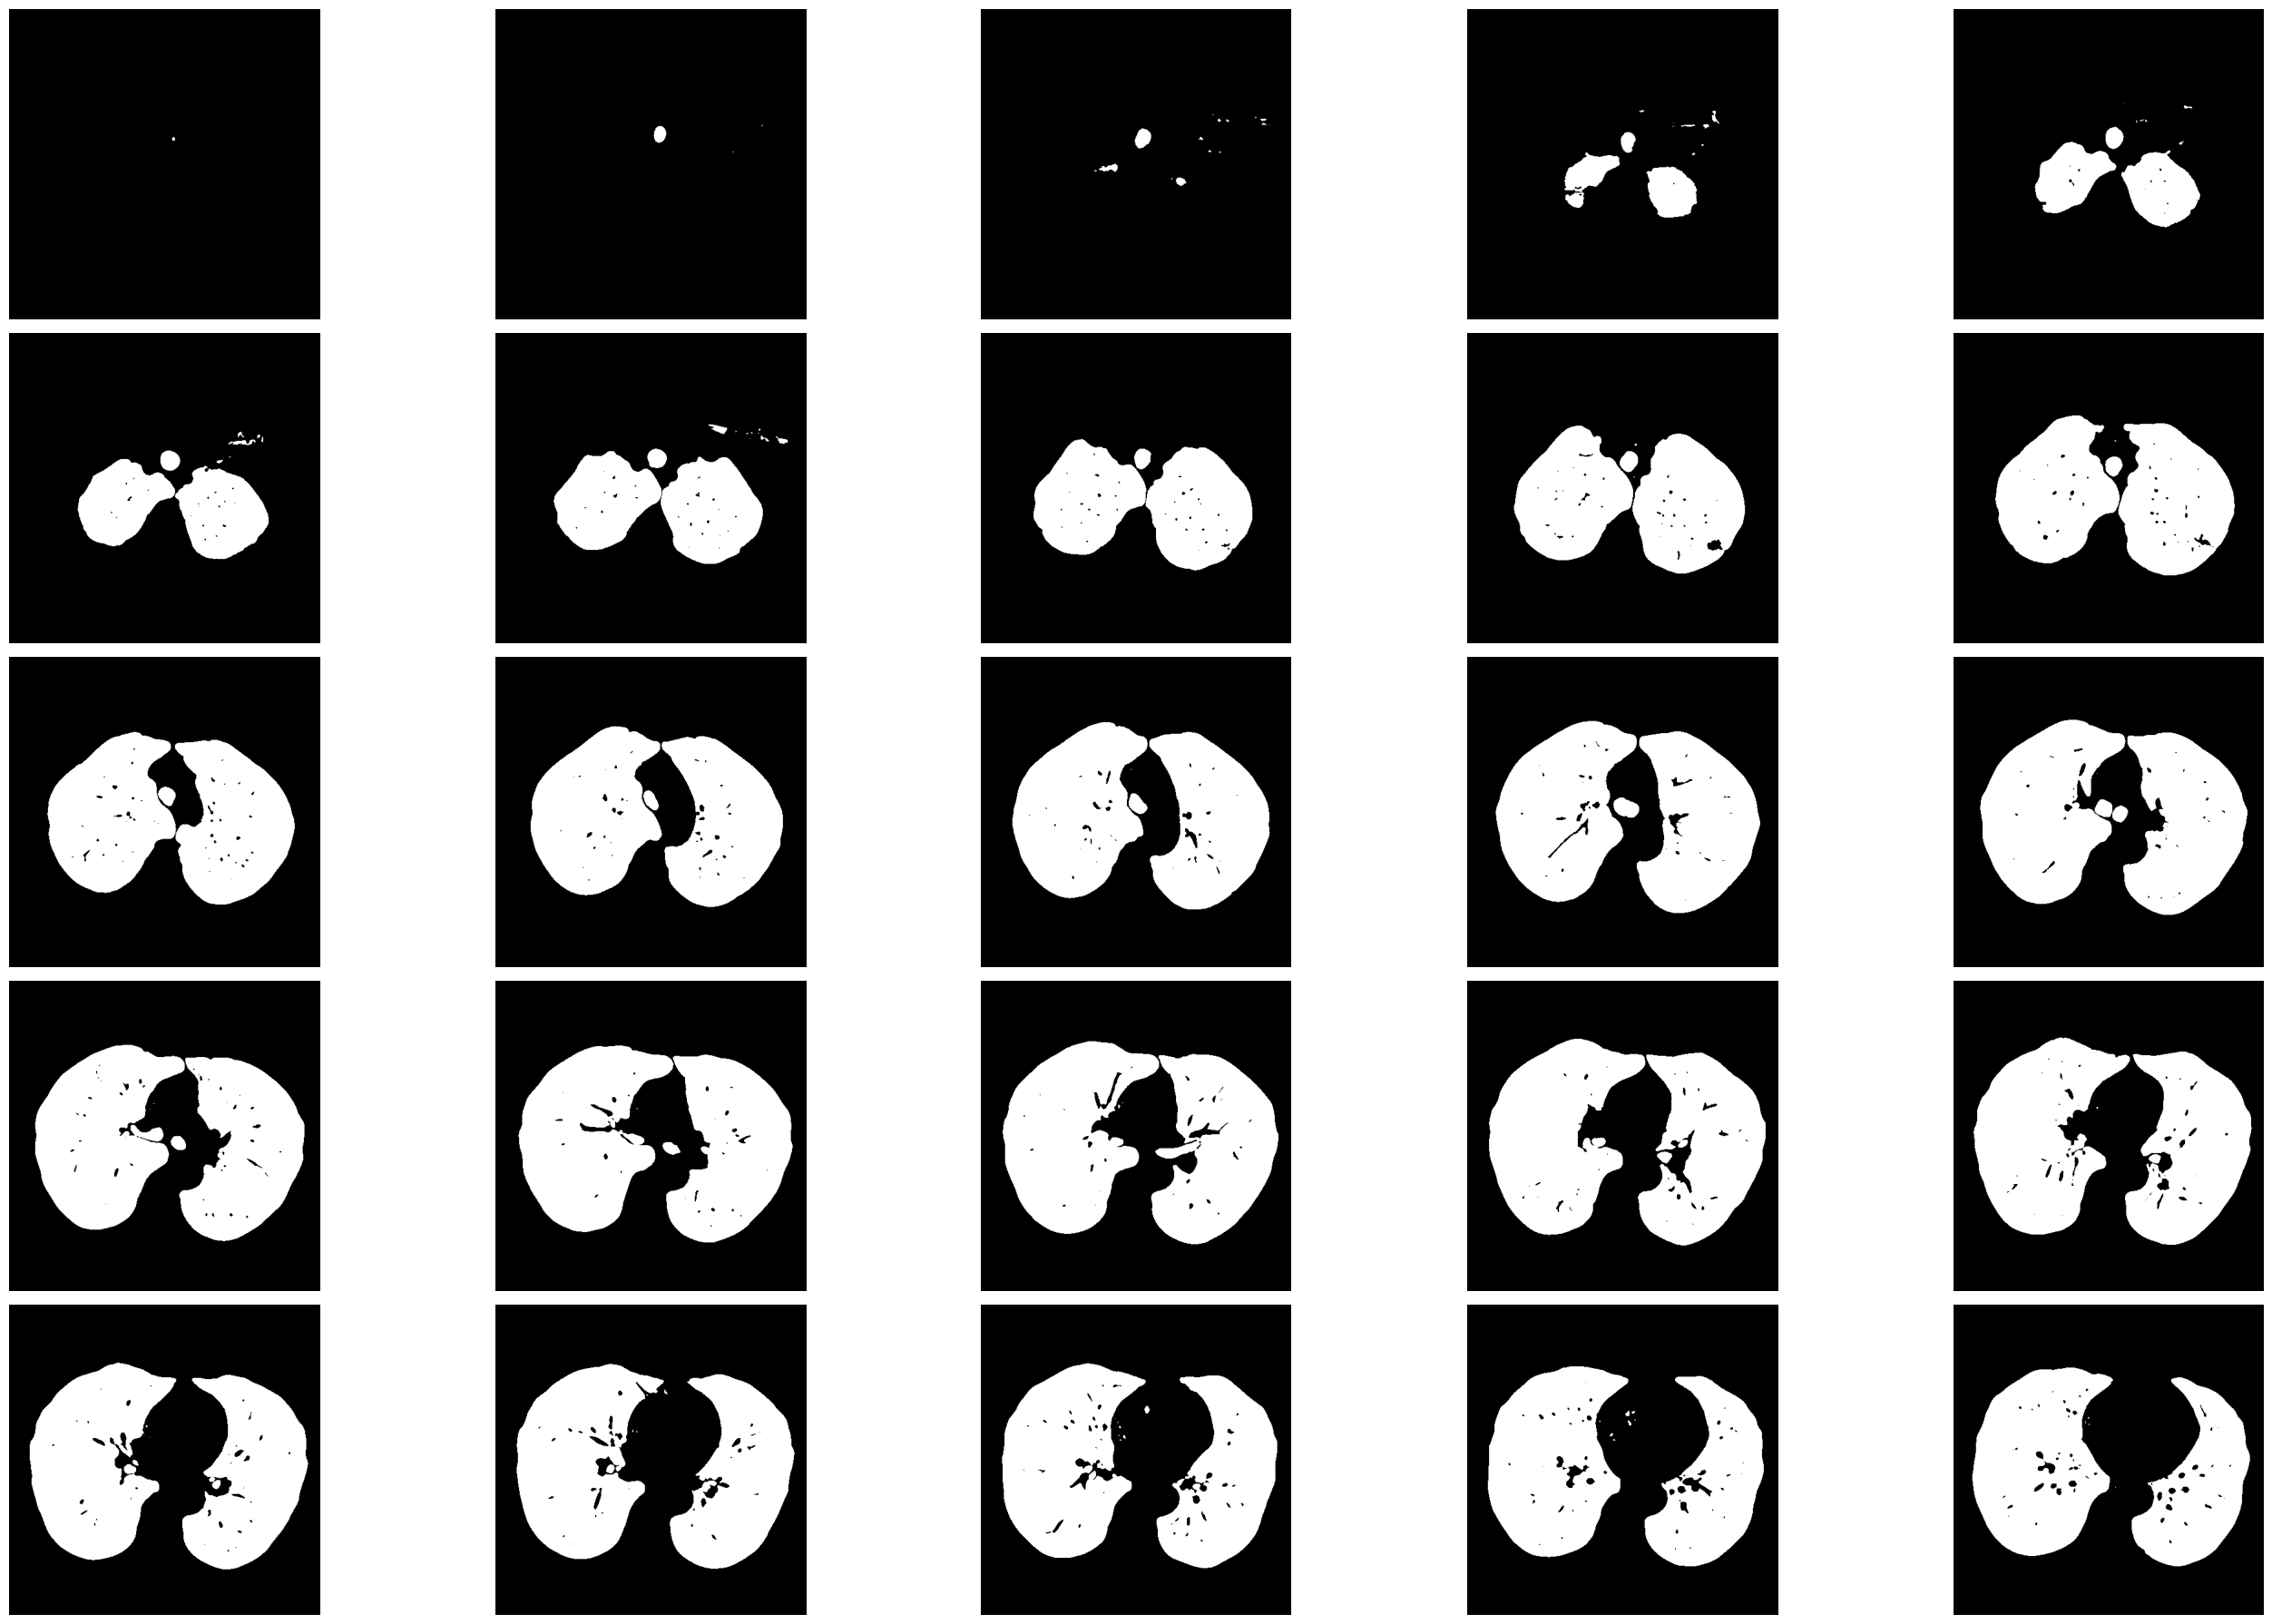

In [47]:
#####################
### DO NOT MODIFY ###
#####################
show_figure("1LAVWGtj7NeImdWMGPAfdVNXF67XbVgiA")

In [ ]:
### WRITE CODE IN HERE. You can have up to 5 cells for this question, but only one is required #######


######################################################################################################

In [ ]:
#### plot the segmented binary lung volume ####
fig, ax = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(volBW[:, :, (5*i+j)*5], cmap='gray')
        ax[i, j].axis("off")
        plt.tight_layout()
        plt.rcParams['figure.figsize'] = (30, 18)

# Step 7 (5 points each, 15 points total)

Show that the segmentation works on 3 more scans.

## Deliverable:

Same as Step 6, but with different scans.

In [ ]:
### WRITE CODE IN HERE. You can have up to 5 cells for this question, but only one is required #######


######################################################################################################

# Step 8 (Bonus 15 points, 5 points each)

If you’ve finished everything above, you’ve already done a full fledged segmentation. However, for an extra challenge, you can try your hand at:

1. Removing just the trachea so that your segmentation is just on the left and right lung without any of the trachea or bronchi.

2. Separating out the two halves of the lung into left/right lungs.

3. There are a ton of python packages that help you visualize the lung as a whole. We highly recommend looking up some marching cube algorithms, but the easier way to go would probably use something like ITK-SNAP or 3D Slicer. Simply [download ITK-SNAP](http://www.itksnap.org/pmwiki/pmwiki.php?n=Downloads.SNAP4) (We recommend version 4.0.2) or [3DSlicer](https://download.slicer.org). You can save all your 3D segmentation binary image slices as NIfTI file (.nii.gz or .nii) using the `nibabel` package. Note that the affine matrix can be an identity. Then, in ITK-SNAP or 3DSlicer load the file and activate the 3D visualizer. For the former its the `Toggle volume rendering` option, while for the latter its useful to import the file as a segmentation and use the `Create closed surface representation` option. This should give you a figure like what you see below:

Show us that this works on at least two scans.

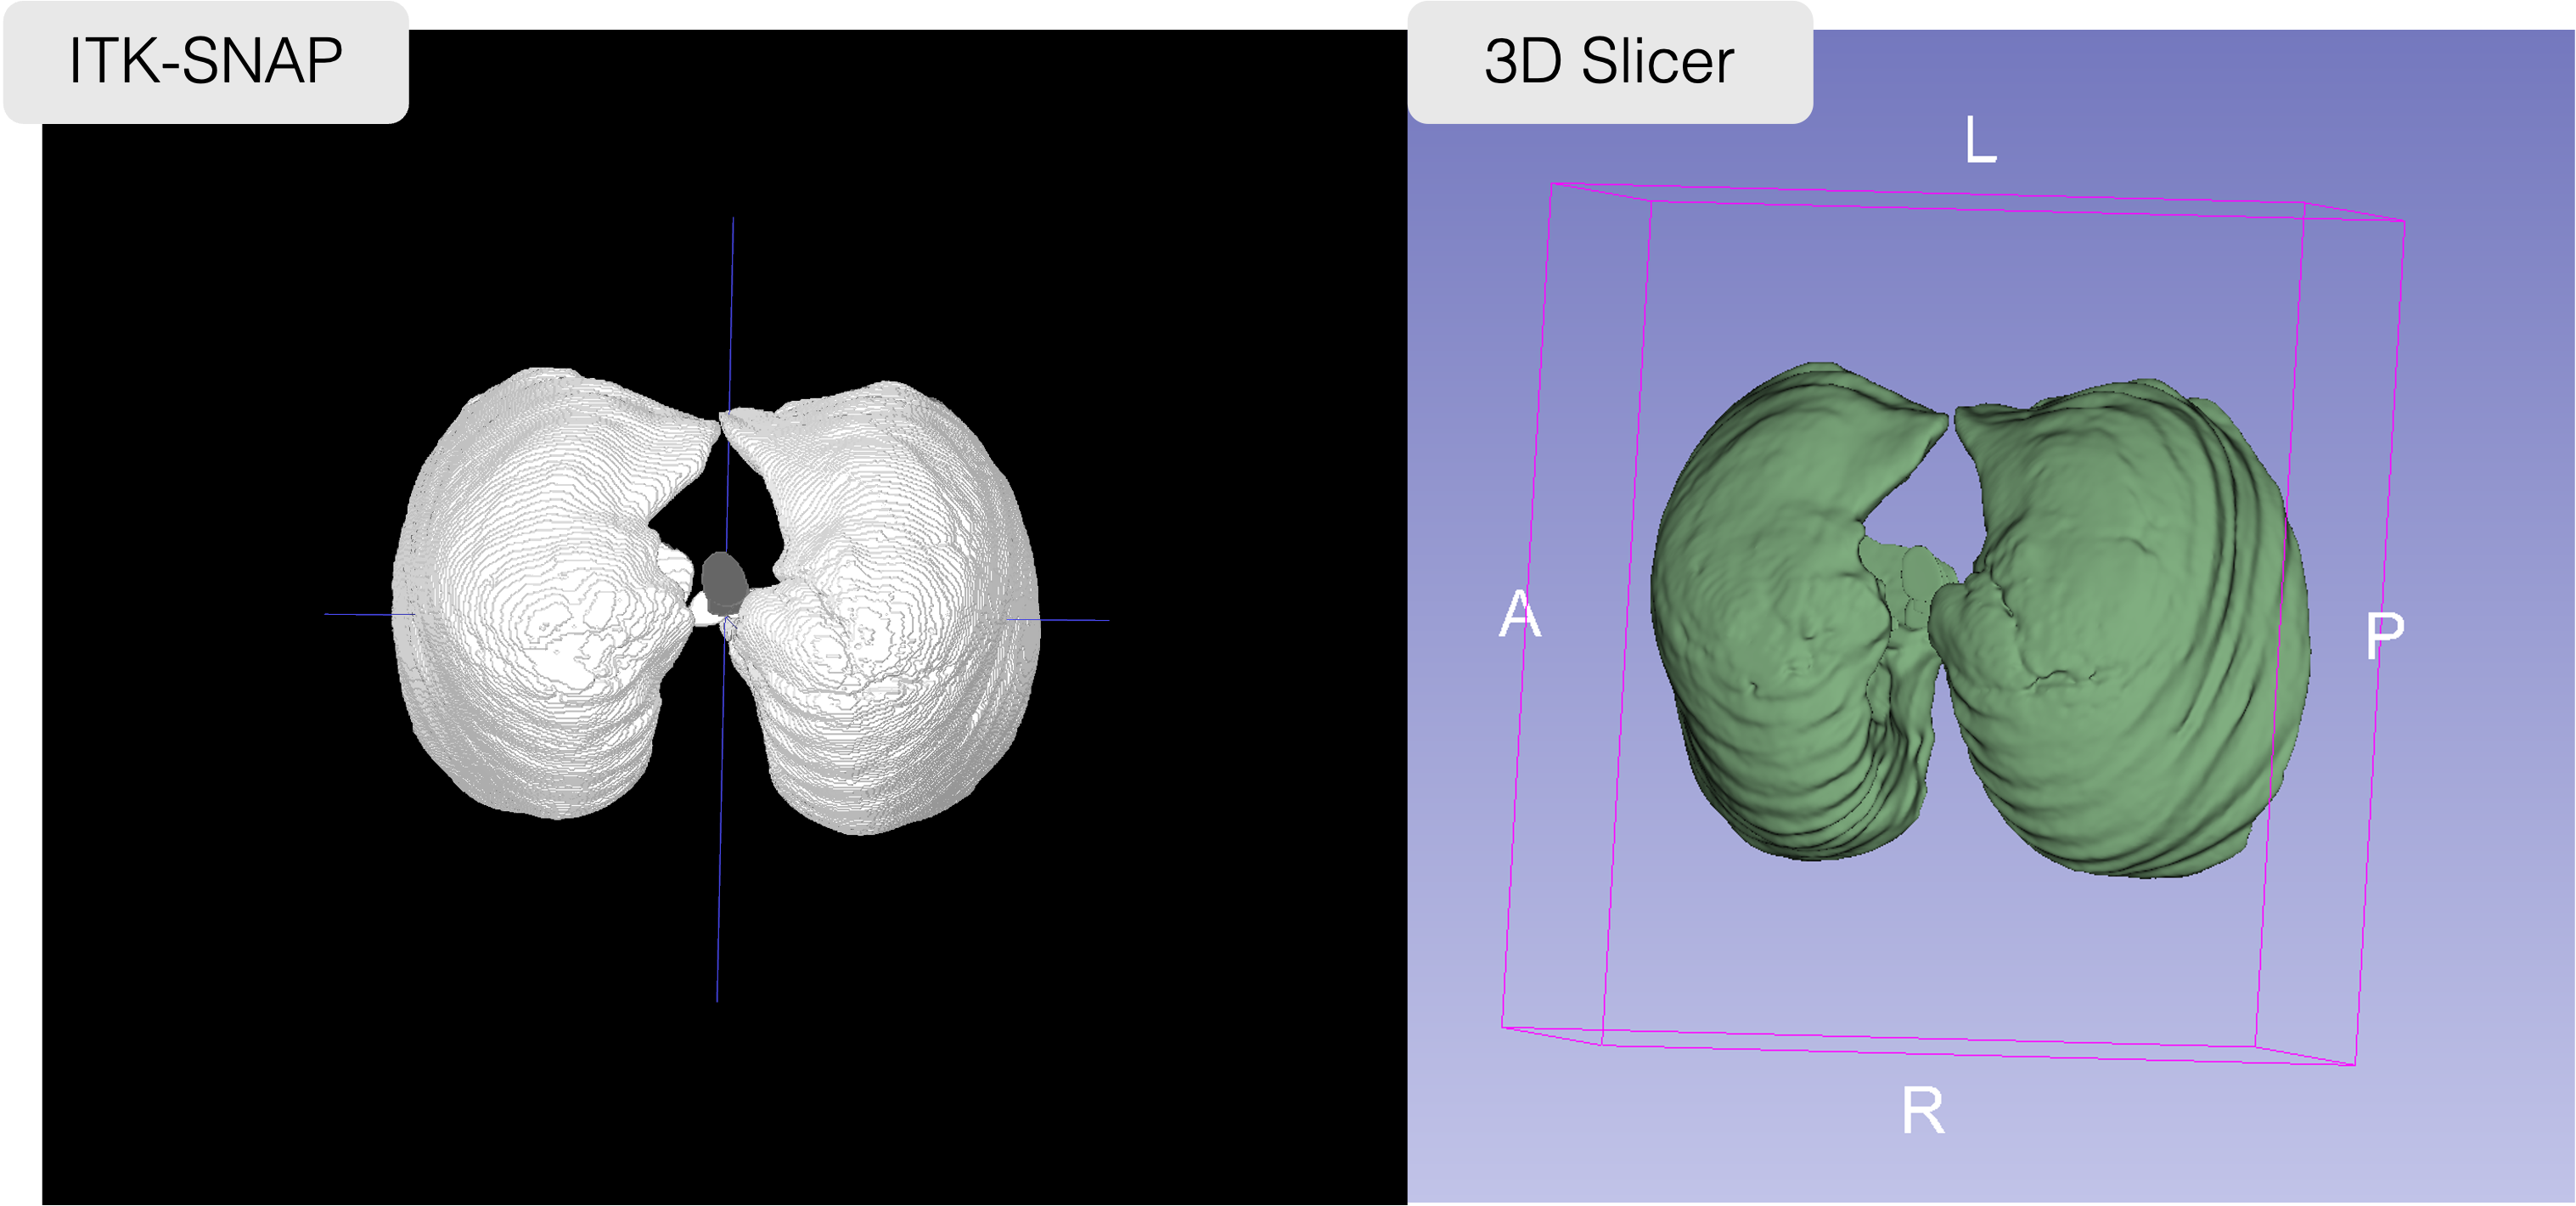

In [70]:
#####################
### DO NOT MODIFY ###
#####################
show_figure("1tvxXJP2P0xyB32trGztAS5u0Q9n3dTtj")

In [ ]:
######################################################################################################
### WRITE CODE IN HERE. You can have up to 5 cells for this question, but only one is required #######
######################################################################################################

######################################################################################################

## References

[Correcting Non-Uniform Illumination - Rice Image](https://www.mathworks.com/help/images/correcting-nonuniform-illumination.html)

[Segmentation - Brain Image](https://analyticsindiamag.com/torchio-3d-medical-imaging/)

We thank Darvin Yi and Laura Bravo Sánchez for the content.